In [2]:
import pandas as pd
import numpy as np

In [9]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [11]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [15]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [17]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [19]:
df.shape

(891, 3)

In [25]:
# Drop rows with missing values from the DataFrame in place
df.dropna(inplace=True)

In [23]:
df.shape

(714, 3)

In [37]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [39]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.2, random_state = 42)

In [53]:
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [55]:
clf = DecisionTreeClassifier()

In [57]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [61]:
accuracy_score(y_test, y_pred)

0.6223776223776224

In [65]:
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv = 10, scoring = 'accuracy'))

0.6317292644757433

In [67]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [127]:
# Create a ColumnTransformer object with two transformers
trf = ColumnTransformer([
    ('first', kbin_age, [0]),  # Apply the kbin_age transformer to the first column
    ('second', kbin_fare, [1])  # Apply the kbin_fare transformer to the second column
])

In [129]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [131]:
# Accessing the 'bin_edges_' attribute of the 'first' named transformer within the 'trf' object
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [119]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [109]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [111]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
536,45.0,12.0,26.5500,10.0,"(41.0, 47.0]","(26.0, 26.55]"
808,39.0,11.0,13.0000,6.0,"(37.0, 41.0]","(10.462, 13.0]"
843,34.5,9.0,6.4375,0.0,"(34.0, 37.0]","(0.0, 7.25]"
213,30.0,8.0,13.0000,6.0,"(29.0, 31.8]","(10.462, 13.0]"
539,22.0,4.0,49.5000,11.0,"(21.0, 23.0]","(46.9, 71.0]"


In [85]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [87]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [89]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6331181533646323

In [99]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy, subsample=None)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy, subsample=None)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.624706572769953


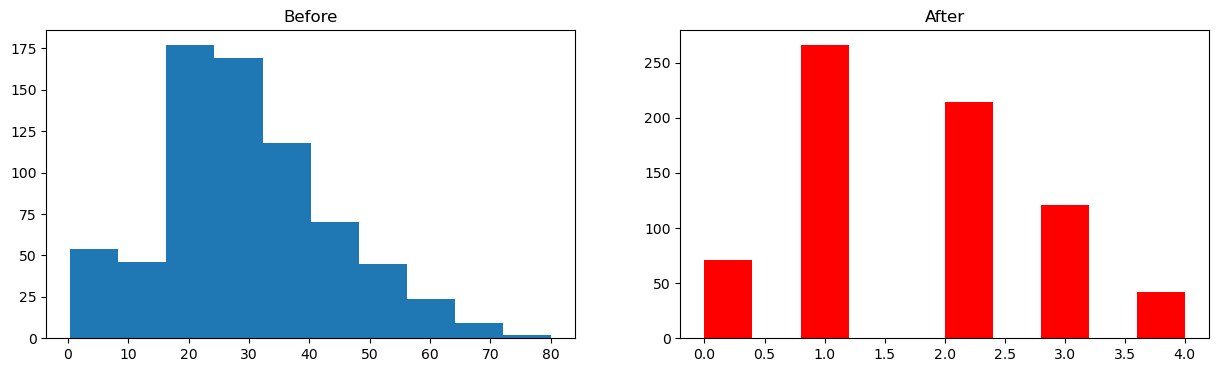

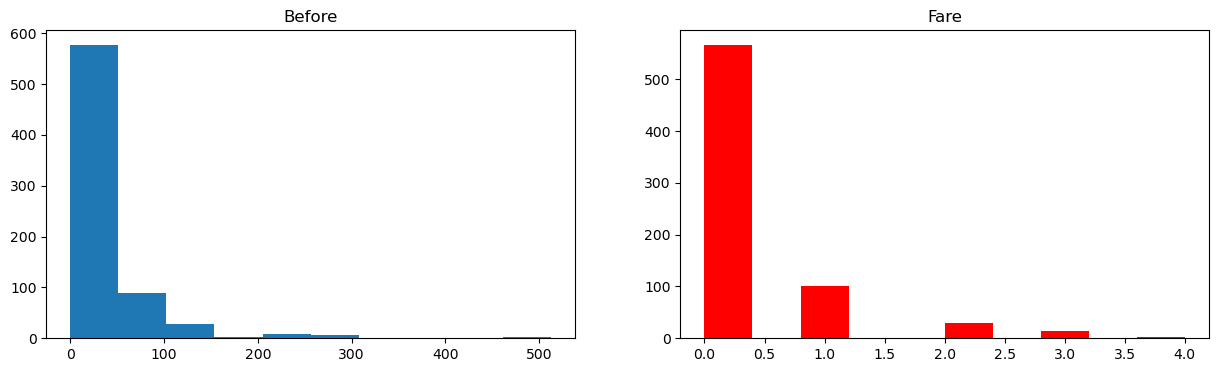

0.6317097026604068


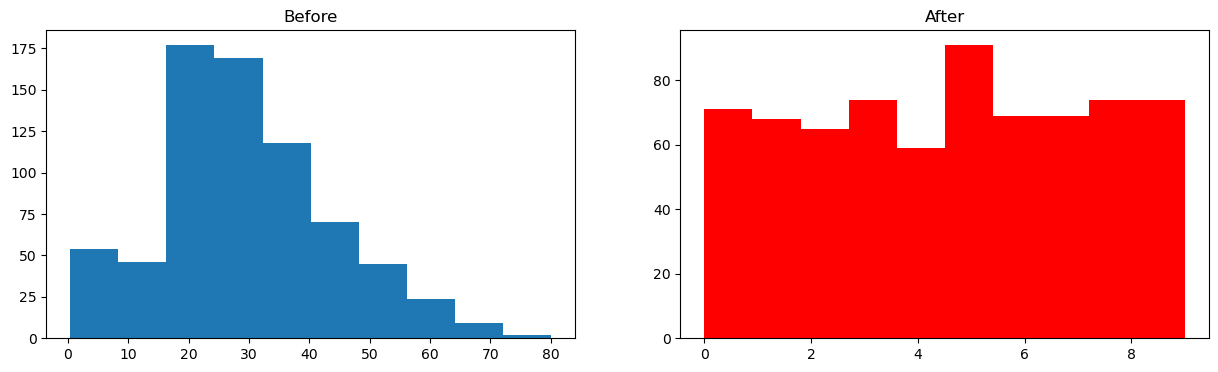

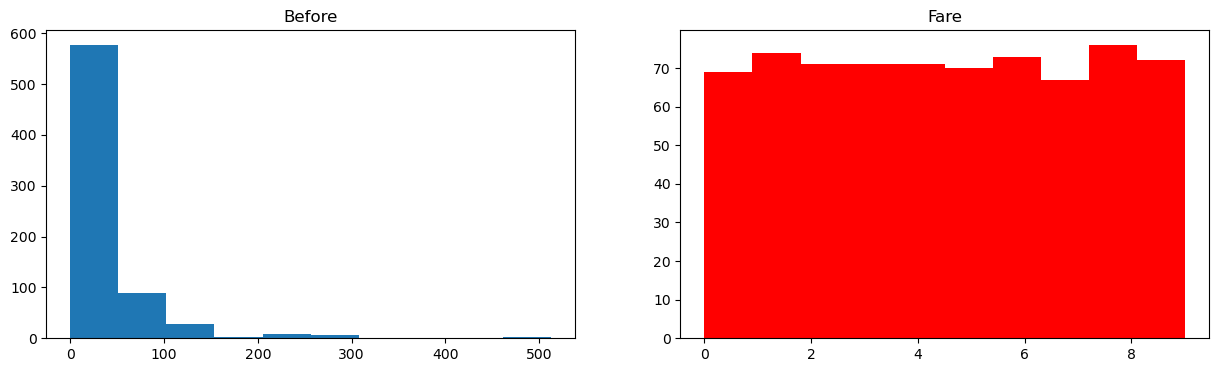

In [103]:
discretize(5,'kmeans')
discretize(10,'quantile')